<h1><center>Lab 7</center></h1>

# **WORK DURING THE LAB**
1. Implement the Particle Swarm Optimization (PSO) algorithm to find the optimum of the
Sphere function.
    - Initialization of particles
    - Compute position, velocity, fitness
    - Compute local best and global best
2. Test the algorithm using different parameter settings.



### General Sphere Functions

In [2]:
import numpy as np


def sphere_function(individual: np.ndarray) -> float:
    """
    Calculate the Sphere function value for a given individual.
    Input:
        individual: np.ndarray, an individual (solution) with 'n' dimensions
    Output:
        float: the fitness value (Sphere function value)
    """
    return np.sum(individual**2)

def fitness_function_sphere(population: np.ndarray) -> np.ndarray:
    """
    Calculate the fitness values for a population of individuals using the Sphere function.
    Input:
        population: np.ndarray, a population of individuals
    Output:
        np.ndarray: an array of fitness values for the population
    """
    return np.array([sphere_function(individual) for individual in population])

def generate_population(size: int, dimensions: int, lower_bound, upper_bound) -> np.ndarray:
    """
    Generate a population of individuals with real codification for the Sphere function.
    Input:
        size: int, size of the population
        dimensions: int, number of dimensions for each individual
    Output:
        np.ndarray: a population of size `size` with individuals of `dimensions` dimensions
    """
    return np.random.uniform(lower_bound, upper_bound, (size, dimensions))

def generate_initial_velocity(size: int, dimensions: int, lower_bound: float = -1.0, upper_bound: float = 1.0) -> np.ndarray:
    """
    Generate initial velocities for particles in PSO.
    Velocities are typically smaller than positions to allow fine movement.
    """
    return np.random.uniform(lower_bound, upper_bound, (size, dimensions))


### Particle Swarm Optimization (PSO) Algorithm
   - Initialization of particles
   - Compute position, velocity
   - Init local best and global best
   - Update velocities: v[] = w\*v[] + c1\*rand1()\*(pbest - x[]) + c2\*rand2()\*(gbest - x[]) `eq (a)`
      - w = inertia weight (keep the particle moving in the same direction)
      - c1 = cognitive coefficient (trust the particle's own experience)
      - c2 = social coefficient (follow the best particle in the swarm)
      - rand1() and rand2() are random numbers in [0,1] (adds randomness)
   - Update positions: x[] = x[] + v[] `eq (b)`

### PSO Pseudocode
```
For each particle
    Initialize particle
END

Do
    For each particle
        Calculate fitness
        If fitness < pbest
            Update pbest
        End If
        If fitness < gbest
            Update gbest
        End If
    End For
    For each particle
        Update velocity using eq (a)
        Update position using eq (b)
    End For
While stopping criteria not met

In [3]:
def pso_sphere(
    population_size: int,
    dimensions: int,
    iterations: int,
    w: float = 0.5,         # Inertia weight
    c1: float = 1.5,        # Cognitive (personal) coefficient
    c2: float = 1.5,        # Social (global) coefficient
    lower_bound: float = -5.12,
    upper_bound: float = 5.12
) -> tuple[np.ndarray, float]:
    """
    Particle Swarm Optimization (PSO) algorithm to find the optimum of the Sphere function.
    Input:
        population_size: int, number of particles in the swarm
        dimensions: int, number of dimensions for each particle
        iterations: int, number of iterations to run the algorithm
        w: float, inertia weight (default is 0.5)
        c1: float, cognitive coefficient (default is 1.5)
        c2: float, social coefficient (default is 1.5)
        lower_bound: float, lower bound for particle positions (default is -5.12)
        upper_bound: float, upper bound for particle positions (default is 5.12)
    Output:
        tuple: best position found and its fitness value
    """
    # Initialize particle positions and velocities
    positions = generate_population(population_size, dimensions, lower_bound, upper_bound)
    velocities = generate_initial_velocity(population_size, dimensions, lower_bound, upper_bound)

    # Initialize personal bests
    pbest_pos = np.copy(positions)
    pbest_scores = fitness_function_sphere(pbest_pos)

    # Initialize global bests
    gbest_idx = np.argmin(pbest_scores)
    gbest_pos = pbest_pos[gbest_idx]
    gbest_score = pbest_scores[gbest_idx]

    for _ in range(iterations):
        for i in range(population_size):
            r1 = np.random.rand(dimensions)
            r2 = np.random.rand(dimensions)

            # Update velocities
            cognitive = c1 * r1 * (pbest_pos[i] - positions[i])
            social = c2 * r2 * (gbest_pos - positions[i])
            velocities[i] = w * velocities[i] + cognitive + social

            # Update positions
            positions[i] += velocities[i]
            # Ensure positions are within bounds
            positions[i] = np.clip(positions[i], lower_bound, upper_bound)

            # Update personal best
            current_score = sphere_function(positions[i])
            if current_score < pbest_scores[i]:
                pbest_scores[i] = current_score
                pbest_pos[i] = positions[i]
                # Update global best
                if current_score < gbest_score:
                    gbest_score = current_score
                    gbest_pos = positions[i]

    return gbest_pos, gbest_score


In [4]:
best_pos, best_score = pso_sphere(
    population_size=50,
    dimensions=10,
    iterations=150,
    w=0.5,
    c1=1.5,
    c2=1.5
)
print(f"Best score: {best_score:.25f}")

best_pos, best_score = pso_sphere(
    population_size=50,
    dimensions=10,
    iterations=150,
    w=0.5,
    c1=2,
    c2=1
)
print(f"Best score: {best_score:.25f}")

best_pos, best_score = pso_sphere(
    population_size=50,
    dimensions=10,
    iterations=150,
    w=0.7,
    c1=2,
    c2=1

)
print(f"Best score: {best_score:.25f}")


Best score: 0.0000000000000179549345802
Best score: 0.0000000000000000000000858
Best score: 0.0000327710445342129213370


# **ASSIGNMENT A7**
- Implement and test two variants of PSO for the Sphere function and one other function
[same as the one selected for the previous lab].
- Perform experiments to compare the two PSO variants selected.
(see for example the review T. M. Shami, A. A. El-Saleh, M. Alswaitti, Q. Al-Tashi, M. A.
Summakieh and S. Mirjalili, "Particle Swarm Optimization: A Comprehensive Survey,"
in IEEE Access, vol. 10, pp. 10031-10061, 2022, doi: 10.1109/ACCESS.2022.3142859.
https://ieeexplore.ieee.org/document/9680690)

## The Sphere function
![Function](https://www.sfu.ca/~ssurjano/spheref.png)

![Formula](https://www.sfu.ca/~ssurjano/spheref2.png)

#### Optimum:

![Global minimum](https://www.sfu.ca/~ssurjano/spheref3.png)


## **Variant I : Standard PSO**
   - Inertia weight (w) is constant
   - Cognitive coefficient (c1) is constant
   - Social coefficient (c2) is constant
   - Velocity is updated using eq (a)
   - Position is updated using eq (b)

**Impelented above in the `Work during the lab` section**

### Testing the standard PSO with different parameters

| Population Size | Iterations | Best Score         | Computation Time (s) |
|-----------------|------------|--------------------|----------------------|
| 10              | 10         | 1.9090938893       | 0.00                 |
| 10              | 100        | 0.0000086112       | 0.02                 |
| 10              | 1000       | 0.0000000000       | 0.18                 |
| 50              | 10         | 2.5449189535       | 0.02                 |
| 50              | 100        | 0.0000000002       | 0.09                 |
| 50              | 1000       | 0.0000000000       | 1.38                 |
| 100             | 10         | 2.7738199015       | 0.02                 |
| 100             | 100        | 0.0000000003       | 0.25                 |
| 100             | 1000       | 0.0000000000       | 2.38                 |
| 500             | 10         | 0.1570424653       | 0.09                 |
| 500             | 100        | 0.0000000000       | 1.19                 |

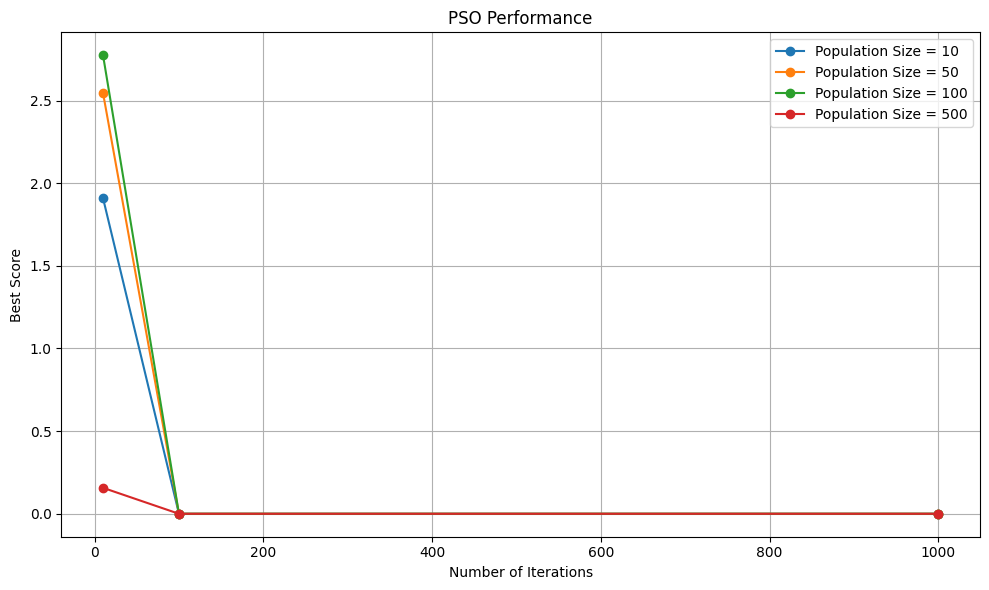

In [43]:
import matplotlib.pyplot as plt
import time

def test_pso_on_function(pso_function, population_sizes, iteration_numbers, dimensions, **pso_params):
    """
    Generalized function to test different PSO variants on a given function.

    Parameters:
        pso_function: callable, the PSO function to test (e.g., standard PSO or a variant).
        population_sizes: list, different population sizes to test.
        iteration_numbers: list, different iteration counts to test.
        dimensions: int, number of dimensions for the optimization problem.
        **pso_params: additional parameters to pass to the PSO function.

    Returns:
        results: dict, best scores for each population size.
        table_md: str, Markdown table summarizing the results.
    """
    results = {}
    table_data = []

    for pop_size in population_sizes:
        best_scores = []
        for iterations in iteration_numbers:
            start_time = time.time()
            best_pos, best_score = pso_function(
                population_size=pop_size,
                dimensions=dimensions,
                iterations=iterations,
                **pso_params
            )
            computation_time = time.time() - start_time
            best_scores.append(best_score)
            table_data.append((pop_size, iterations, best_score, computation_time))
        results[pop_size] = best_scores

    # Generate Markdown table
    table_md = "| Population Size | Iterations | Best Score         | Computation Time (s) |\n"
    table_md += "|-----------------|------------|--------------------|----------------------|\n"
    for row in table_data:
        table_md += f"| {row[0]:<15} | {row[1]:<10} | {row[2]:<18.10f} | {row[3]:<20.2f} |\n"

    return results, table_md

def plot_pso_results(results, iteration_numbers):
    """
    Plot the results of PSO tests.

    Parameters:
        results: dict, best scores for each population size.
        iteration_numbers: list, different iteration counts to test.
    """
    plt.figure(figsize=(10, 6))
    for pop_size, best_scores in results.items():
        plt.plot(iteration_numbers, best_scores, marker='o', label=f'Population Size = {pop_size}')

    plt.xlabel('Number of Iterations')
    plt.ylabel('Best Score')
    plt.title('PSO Performance')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Test standard PSO
results, table_md = test_pso_on_function(
    pso_function=pso_sphere,
    population_sizes=[10, 50, 100, 500],
    iteration_numbers=[10, 100, 1000],
    dimensions= 10,
    w=0.5,
    c1=1.5,
    c2=1.5,
    lower_bound=-5.12,
    upper_bound=5.12
)
print(table_md)

# Plot the results
plot_pso_results(results, iteration_numbers=[10, 100, 1000])

## Conclusions for the plot (population size vs. number of iterations)
- The best score improves with an increase in the number of iterations. But, for the `Sphere function` the PSO converges very fast to the global minimum (after around 100 iterations).
- The best score also improves with an increase in the particle population size. This difference can be observed for lower iterations amoounts.
- Both the population size and the number of iterations increase the computation time.


| Population Size | Iterations | Best Score         | Computation Time (s) |
|-----------------|------------|--------------------|----------------------|
| 10              | 10         | 1.9090938893       | 0.00                 |
| 10              | 100        | 0.0000086112       | 0.02                 |
| 10              | 1000       | 0.0000000000       | 0.18                 |
| 50              | 10         | 2.5449189535       | 0.02                 |
| 50              | 100        | 0.0000000002       | 0.09                 |
| 50              | 1000       | 0.0000000000       | 1.38                 |
| 100             | 10         | 2.7738199015       | 0.02                 |
| 100             | 100        | 0.0000000003       | 0.25                 |
| 100             | 1000       | 0.0000000000       | 2.38                 |
| 500             | 10         | 0.1570424653       | 0.09                 |
| 500             | 100        | 0.0000000000       | 1.19                 |
| 500             | 1000       | 0.0000000000       | 12.23                |



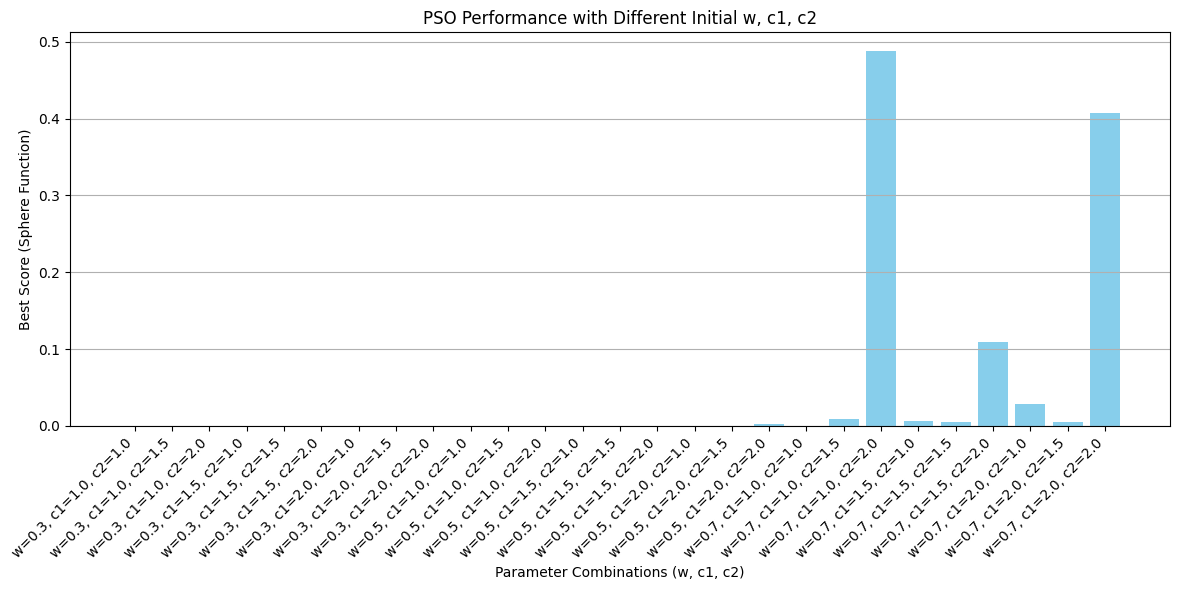

In [10]:


# Define parameter ranges
w_values = [0.3, 0.5, 0.7]
c1_values = [1.0, 1.5, 2.0]
c2_values = [1.0, 1.5, 2.0]

# PSO settings
population_size = 25
dimensions = 5
iterations = 50
lower_bound = -5.12
upper_bound = 5.12

# Store results
results = []
labels = []

# Test different combinations of w, c1, and c2
for w in w_values:
    for c1 in c1_values:
        for c2 in c2_values:
            start_time = time.time()
            _, best_score = pso_sphere(
                population_size=population_size,
                dimensions=dimensions,
                iterations=iterations,
                w=w,
                c1=c1,
                c2=c2,
                lower_bound=lower_bound,
                upper_bound=upper_bound
            )
            computation_time = time.time() - start_time
            results.append(best_score)
            labels.append(f"w={w}, c1={c1}, c2={c2}")

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(labels, results, color='skyblue')
plt.xlabel('Parameter Combinations (w, c1, c2)')
plt.ylabel('Best Score (Sphere Function)')
plt.title('PSO Performance with Different Initial w, c1, c2')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

## Conclusions for the plot (w, c1, c2)
- PSO is very good for the `Sphere function` and most parameters settings work well.
- The only settings which are not working well are the ones with `w=0.7`, because particles move faster (explore more) and they are not converging to the global minimum. Since the `Sphere function` is convex, it does not benefit from more exploration.

# **Variant II : Adaptive PSO**
   - Inertia weight (w) is decreasing
   - Cognitive coefficient (c1) is increasing
   - Social coefficient (c2) is increasing
   - Velocity is updated using eq (a)
   - Position is updated using eq (b)

In [20]:
def pso_sphere_adaptive(
    population_size: int,
    dimensions: int,
    iterations: int,
    w_max: float = 0.9,
    w_min: float = 0.4,
    c1_min: float = 1.5,
    c1_max: float = 2.5,
    c2_min: float = 1.5,
    c2_max: float = 2.5,
    lower_bound: float = -5.12,
    upper_bound: float = 5.12
) -> tuple[np.ndarray, float]:
    """
    Adaptive Particle Swarm Optimization (PSO) for Sphere function.
    w decreases, c1 and c2 increase over iterations.
    """
    # Initialize positions and velocities
    positions = generate_population(population_size, dimensions, lower_bound, upper_bound)
    velocities = generate_initial_velocity(population_size, dimensions, lower_bound, upper_bound)

    # Initialize personal bests
    pbest_pos = np.copy(positions)
    pbest_scores = fitness_function_sphere(pbest_pos)

    # Initialize global best
    gbest_idx = np.argmin(pbest_scores)
    gbest_pos = pbest_pos[gbest_idx]
    gbest_score = pbest_scores[gbest_idx]

    for iter in range(iterations):
        # Dynamic update of w, c1, c2
        w = w_max - ((w_max - w_min) * iter / iterations)
        c1 = c1_min + ((c1_max - c1_min) * iter / iterations)
        c2 = c2_min + ((c2_max - c2_min) * iter / iterations)
        for i in range(population_size):
            r1 = np.random.rand(dimensions)
            r2 = np.random.rand(dimensions)

            cognitive = c1 * r1 * (pbest_pos[i] - positions[i])
            social = c2 * r2 * (gbest_pos - positions[i])
            velocities[i] = w * velocities[i] + cognitive + social

            positions[i] += velocities[i]
            positions[i] = np.clip(positions[i], lower_bound, upper_bound)

            current_score = sphere_function(positions[i])
            if current_score < pbest_scores[i]:
                pbest_scores[i] = current_score
                pbest_pos[i] = positions[i]
                if current_score < gbest_score:
                    gbest_score = current_score
                    gbest_pos = positions[i]

    return gbest_pos, gbest_score


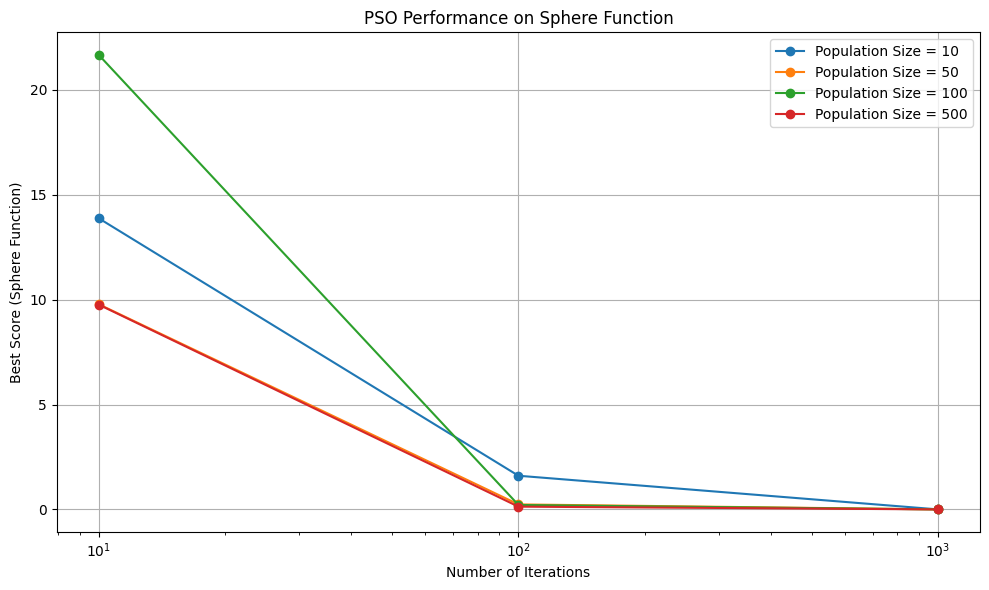

| Population Size | Iterations | Best Score         | Computation Time (s) |
|-----------------|------------|--------------------|----------------------|
| 10              | 10         | 13.8767015581      | 0.00                 |
| 10              | 100        | 1.6051373754       | 0.02                 |
| 10              | 1000       | 0.0000378739       | 0.18                 |
| 50              | 10         | 9.7797697591       | 0.01                 |
| 50              | 100        | 0.2385888722       | 0.09                 |
| 50              | 1000       | 0.0000000029       | 1.08                 |
| 100             | 10         | 21.6635248745      | 0.02                 |
| 100             | 100        | 0.2111594630       | 0.19                 |
| 100             | 1000       | 0.0000000002       | 1.77                 |
| 500             | 10         | 9.7606973360       | 0.09                 |
| 500             | 100        | 0.1314500263       | 0.88                 |

In [22]:
# Test adaptive PSO
results_adaptive, table_md_adaptive = test_pso_on_function(
    pso_function=pso_sphere_adaptive,
    population_sizes=[10, 50, 100, 500],
    iteration_numbers=[10, 100, 1000],
    dimensions=10,
    w_max=0.9,
    w_min=0.4,
    c1_min=1.5,
    c1_max=2.5,
    c2_min=1.5,
    c2_max=2.5,
    lower_bound=-5.12,
    upper_bound=5.12
)
plot_pso_results(results_adaptive, iteration_numbers=[10, 100, 1000])
print(table_md_adaptive)

| Population Size | Iterations | Standard PSO Best Score | Adaptive PSO Best Score |
|-----------------|------------|-------------------------|--------------------------|
| 10              | 10         | 6.7113127732            | 20.7794130558            |
| 10              | 100        | 0.0000029344            | 0.7980991967             |
| 10              | 1000       | 0.0000000000            | 0.0000024500             |
| 50              | 10         | 1.4789305463            | 22.3419009675            |
| 50              | 100        | 0.0000000033            | 0.4489914931             |
| 50              | 1000       | 0.0000000000            | 0.0000000343             |
| 100             | 10         | 1.2917316178            | 11.7103858532            |
| 100             | 100        | 0.0000000001            | 0.4910807912             |
| 100             | 1000       | 0.0000000000            | 0.0000000199             |



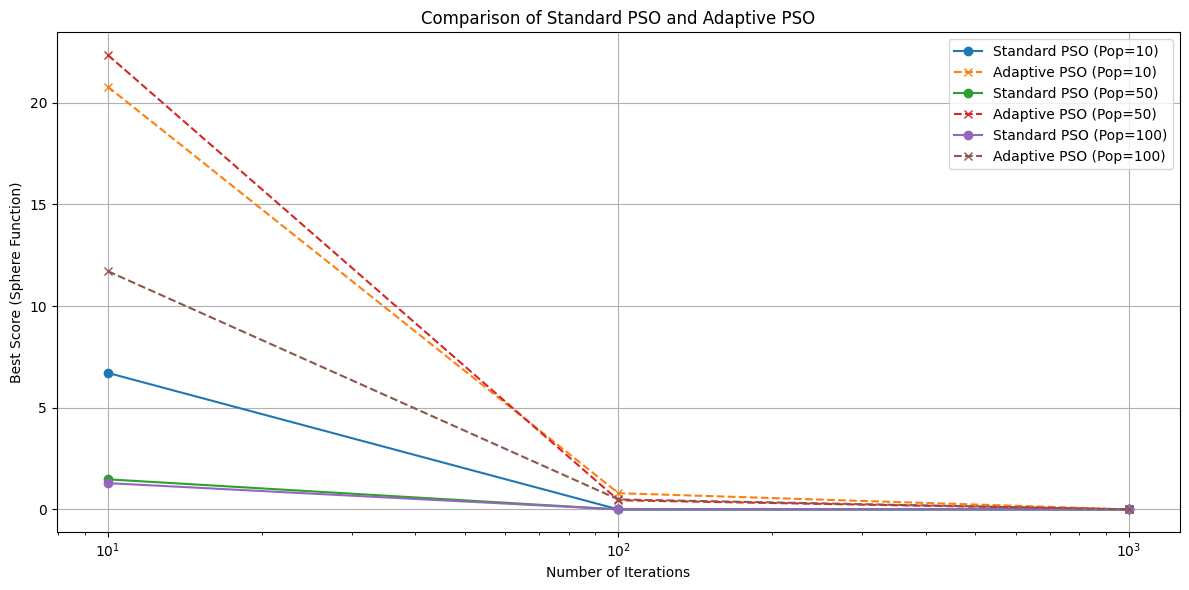

In [21]:
import time

# Define test parameters
population_sizes = [10, 50, 100]
iteration_numbers = [10, 100, 1000]
dimensions = 10
lower_bound = -5.12
upper_bound = 5.12

# Function to compare Standard PSO and Adaptive PSO
def compare_pso_algorithms():
    results_standard = {}
    results_adaptive = {}
    table_data = []

    # Test Standard PSO
    for pop_size in population_sizes:
        best_scores_standard = []
        for iterations in iteration_numbers:
            _, best_score = pso_sphere(
                population_size=pop_size,
                dimensions=dimensions,
                iterations=iterations,
                w=0.5,
                c1=1.5,
                c2=1.5,
                lower_bound=lower_bound,
                upper_bound=upper_bound
            )
            best_scores_standard.append(best_score)
        results_standard[pop_size] = best_scores_standard

    # Test Adaptive PSO
    for pop_size in population_sizes:
        best_scores_adaptive = []
        for iterations in iteration_numbers:
            _, best_score = pso_sphere_adaptive(
                population_size=pop_size,
                dimensions=dimensions,
                iterations=iterations,
                w_max=0.9,
                w_min=0.4,
                c1_min=1.5,
                c1_max=2.5,
                c2_min=1.5,
                c2_max=2.5,
                lower_bound=lower_bound,
                upper_bound=upper_bound
            )
            best_scores_adaptive.append(best_score)
        results_adaptive[pop_size] = best_scores_adaptive

    # Generate Markdown table
    table_md = "| Population Size | Iterations | Standard PSO Best Score | Adaptive PSO Best Score |\n"
    table_md += "|-----------------|------------|-------------------------|--------------------------|\n"
    for pop_size in population_sizes:
        for i, iterations in enumerate(iteration_numbers):
            table_md += f"| {pop_size:<15} | {iterations:<10} | {results_standard[pop_size][i]:<23.10f} | {results_adaptive[pop_size][i]:<24.10f} |\n"

    print(table_md)

    # Plot results
    plt.figure(figsize=(12, 6))
    for pop_size in population_sizes:
        plt.plot(iteration_numbers, results_standard[pop_size], marker='o', label=f'Standard PSO (Pop={pop_size})')
        plt.plot(iteration_numbers, results_adaptive[pop_size], marker='x', linestyle='--', label=f'Adaptive PSO (Pop={pop_size})')

    plt.xlabel('Number of Iterations')
    plt.ylabel('Best Score (Sphere Function)')
    plt.title('Comparison of Standard PSO and Adaptive PSO')
    plt.xscale('log')  # Log scale for iterations
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Run the comparison
compare_pso_algorithms()

## Conclusion: Standard vs Fully Adaptive PSO on the Sphere Function

### Setup
- **Test Function**: Sphere function.
- **Variants**:
  - Standard PSO with fixed `w`, `c1`, `c2`.
  - Fully Adaptive PSO where `w` decreases, and `c1`, `c2` increase over time.
- **Parameters**: Tested with varying population sizes (10, 50, 100) and iteration counts (10, 100, 1000).

### Results Summary

| Population Size | Iterations | Standard PSO Best Score | Adaptive PSO Best Score |
|-----------------|------------|-------------------------|--------------------------|
| 10              | 10         | 6.7113127732            | 20.7794130558            |
| 10              | 100        | 0.0000029344            | 0.7980991967             |
| 10              | 1000       | 0.0000000000            | 0.0000024500             |
| 50              | 10         | 1.4789305463            | 22.3419009675            |
| 50              | 100        | 0.0000000033            | 0.4489914931             |
| 50              | 1000       | 0.0000000000            | 0.0000000343             |
| 100             | 10         | 1.2917316178            | 11.7103858532            |
| 100             | 100        | 0.0000000001            | 0.4910807912             |
| 100             | 1000       | 0.0000000000            | 0.0000000199             |

### Observations
- Standard PSO consistently achieved better results than the adaptive version.
- Fully Adaptive PSO performed worse, especially in early iterations.
- Even with more particles and iterations, it often converged slower.
- Adaptive PSO leads to high velocity at the beginning (high w), so particles explore too much, missing good regions and too strong attraction later, particles clump together too fast, even if they’re not near the global best.
- Standard PSO maintains a fixed tradeoff between exploring new areas and exploiting the best-known positions. In adaptive PSO, the shifting parameters can unbalance this.

### Conclusion
Fully Adaptive PSO did not outperform Standard PSO on the Sphere function. The simplicity and smoothness of the Sphere function favor stable parameter settings. Adaptive strategies may be more effective on complex or multimodal functions.


## The Styblinski-Tang function
![Function](https://www.sfu.ca/~ssurjano/stybtang.png)

![Formula](https://www.sfu.ca/~ssurjano/spheref2.png)

#### Optimum:

![Global minimum](https://www.sfu.ca/~ssurjano/stybtang3.png)

#### General functions:

In [28]:
def styblinski_tang_function(individual: np.ndarray) -> float:
    """
    Calculate the Styblinski-Tang function value for a given individual.
    Input:
        individual: np.ndarray, an individual (solution) with 'n' dimensions
    Output:
        float: the fitness value (Styblinski-Tang value)
    """
    return 0.5 * np.sum(individual**4 - 16*individual**2 + 5*individual)

def fitness_function_styblinski_tang(population: np.ndarray) -> np.ndarray:
    """
    Calculate the fitness values for a population of individuals using the Styblinski-Tang function.
    Input:
        population: np.ndarray, a population of individuals
    Output:
        np.ndarray: an array of fitness values for the population
    """
    return np.array([styblinski_tang_function(individual) for individual in population])

def get_global_minimum_styblinski_tang(dimensions: int) -> float:
    """
    Get the global minimum for the Styblinski-Tang function.
    Input:
        dimensions: int, number of dimensions
    Output:
        float: global minimum
    """
    return -39.16599 * dimensions

def get_absolute_difference_styblinski_tang(individual: np.ndarray) -> float:
    """
    Calculate the absolute difference between the Styblinski-Tang function value and the global minimum.
    Input:
        individual: np.ndarray, an individual (solution) with 'n' dimensions
    Output:
        float: absolute difference
    """
    return abs(styblinski_tang_function(individual) - get_global_minimum_styblinski_tang(len(individual)))

## **Variant I : Standard PSO**
   - Inertia weight (w) is constant
   - Cognitive coefficient (c1) is constant
   - Social coefficient (c2) is constant
   - Velocity is updated using eq (a)
   - Position is updated using eq (b)

In [26]:
def pso_styblinski_tang(
    population_size: int,
    dimensions: int,
    iterations: int,
    w: float = 0.5,         # Inertia weight
    c1: float = 1.5,        # Cognitive (personal) coefficient
    c2: float = 1.5,        # Social (global) coefficient
    lower_bound: float = -5.0,
    upper_bound: float = 5.0
) -> tuple[np.ndarray, float]:
    """
    Particle Swarm Optimization (PSO) algorithm to find the optimum of the Styblinski-Tang function.
    Input:
        population_size: int, number of particles in the swarm
        dimensions: int, number of dimensions for each particle
        iterations: int, number of iterations to run the algorithm
        w: float, inertia weight (default is 0.5)
        c1: float, cognitive coefficient (default is 1.5)
        c2: float, social coefficient (default is 1.5)
        lower_bound: float, lower bound for particle positions (default is -5.0)
        upper_bound: float, upper bound for particle positions (default is 5.0)
    Output:
        tuple: best position found and its fitness value
    """
    # Initialize particle positions and velocities
    positions = generate_population(population_size, dimensions, lower_bound, upper_bound)
    velocities = generate_initial_velocity(population_size, dimensions, lower_bound, upper_bound)

    # Initialize personal bests
    pbest_pos = np.copy(positions)
    pbest_scores = fitness_function_styblinski_tang(pbest_pos)

    # Initialize global bests
    gbest_idx = np.argmin(pbest_scores)
    gbest_pos = pbest_pos[gbest_idx]
    gbest_score = pbest_scores[gbest_idx]

    for _ in range(iterations):
        for i in range(population_size):
            r1 = np.random.rand(dimensions)
            r2 = np.random.rand(dimensions)

            # Update velocities
            cognitive = c1 * r1 * (pbest_pos[i] - positions[i])
            social = c2 * r2 * (gbest_pos - positions[i])
            velocities[i] = w * velocities[i] + cognitive + social

            # Update positions
            positions[i] += velocities[i]
            # Ensure positions are within bounds
            positions[i] = np.clip(positions[i], lower_bound, upper_bound)

            # Update personal best
            current_score = styblinski_tang_function(positions[i])
            if current_score < pbest_scores[i]:
                pbest_scores[i] = current_score
                pbest_pos[i] = positions[i]
                # Update global best
                if current_score < gbest_score:
                    gbest_score = current_score
                    gbest_pos = positions[i]

    return gbest_pos, gbest_score

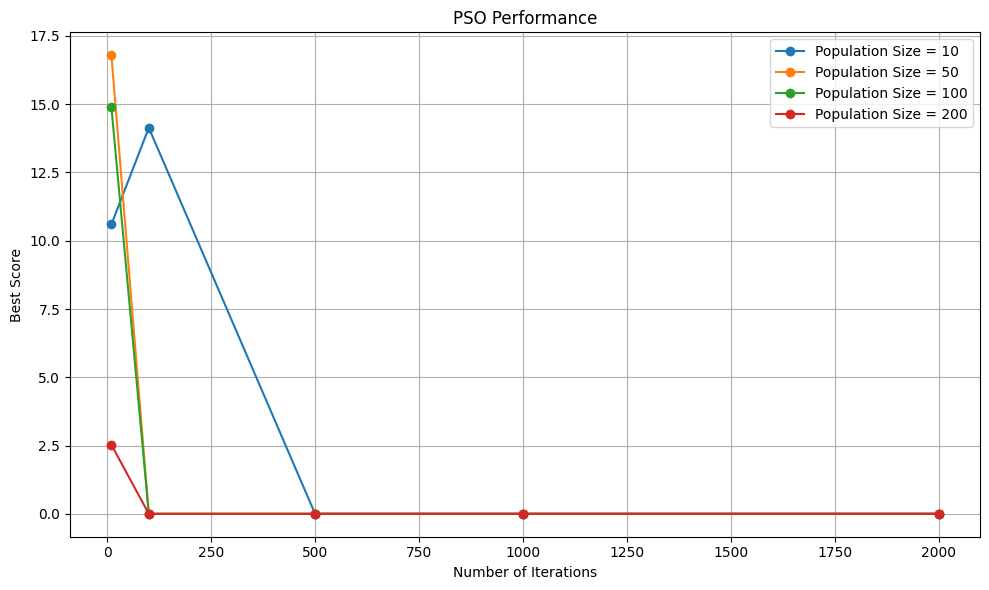

| Population Size | Iterations | Best Score         | Computation Time (s) |
|-----------------|------------|--------------------|----------------------|
| 10              | 10         | -185.2339626983    | 0.01                 |
| 10              | 100        | -181.6941094685    | 0.05                 |
| 10              | 500        | -195.8308285189    | 0.19                 |
| 10              | 1000       | -195.8308285189    | 0.42                 |
| 10              | 2000       | -195.8308285189    | 0.84                 |
| 50              | 10         | -179.0379288145    | 0.03                 |
| 50              | 100        | -195.8308285189    | 0.23                 |
| 50              | 500        | -195.8308285189    | 0.94                 |
| 50              | 1000       | -195.8308285189    | 1.57                 |
| 50              | 2000       | -195.8308285189    | 3.11                 |
| 100             | 10         | -180.9333128351    | 0.03                 |

In [45]:

results_styblinski, table_md_styblinski = test_pso_on_function(
    pso_function=pso_styblinski_tang,
    population_sizes=[10, 50, 100, 200],
    iteration_numbers=[10, 100, 500, 1000, 2000],
    dimensions=5,
    w=0.5,
    c1=1.5,
    c2=1.5,
    lower_bound=-5.0,
    upper_bound=5.0
)

# Correct calculation of absolute differences
absolute_differences = {}

global_minimum = get_global_minimum_styblinski_tang(dimensions=5)
for pop_size, scores in results_styblinski.items():
    abs_diffs = [abs(score - global_minimum) for score in scores]
    absolute_differences[pop_size] = abs_diffs
plot_pso_results(absolute_differences, iteration_numbers=[10, 100, 500, 1000, 2000])
print(table_md_styblinski)

## Conclusions for the Styblinski-Tang Function (Population Size vs. Number of Iterations)

- The PSO algorithm successfully reaches the global optimum (-195.8308) for all population sizes, provided the number of iterations is sufficient (≥ 500).
- For small populations (e.g. 10), a higher number of iterations is essential to overcome limited exploration and reach the global optimum.
- Larger populations (50, 100, 200) are more likely to reach the global optimum with fewer iterations, showing the benefit of diversity in swarm behavior.
- Beyond 500 iterations, improvements in best score plateau, indicating that convergence has occurred and more iterations provide no further optimization benefit.
- Computation time increases with both population size and iteration count, approximately linearly, which is expected due to the nature of swarm updates.



Global optimum for the Styblinski-Tang function is -39.16599 * dimensions. For 5 dimensions, it is **-195.82995**.
| Population Size | Iterations | Best Score         | Computation Time (s) |
|-----------------|------------|--------------------|----------------------|
| 10              | 10         | -185.2339626983    | 0.01                 |
| 10              | 100        | -181.6941094685    | 0.05                 |
| 10              | 500        | -195.8308285189    | 0.19                 |
| 10              | 1000       | -195.8308285189    | 0.42                 |
| 10              | 2000       | -195.8308285189    | 0.84                 |
| 50              | 10         | -179.0379288145    | 0.03                 |
| 50              | 100        | -195.8308285189    | 0.23                 |
| 50              | 500        | -195.8308285189    | 0.94                 |
| 50              | 1000       | -195.8308285189    | 1.57                 |
| 50              | 2000       | -195.8308285189    | 3.11                 |
| 100             | 10         | -180.9333128351    | 0.03                 |
| 100             | 100        | -195.8308285188    | 0.30                 |
| 100             | 500        | -195.8308285189    | 1.45                 |
| 100             | 1000       | -195.8308285189    | 2.77                 |
| 100             | 2000       | -195.8308285189    | 6.42                 |
| 200             | 10         | -193.3016112059    | 0.09                 |
| 200             | 100        | -195.8308285189    | 0.65                 |
| 200             | 500        | -195.8308285189    | 3.12                 |
| 200             | 1000       | -195.8308285189    | 7.10                 |
| 200             | 2000       | -195.8308285189    | 13.37                |

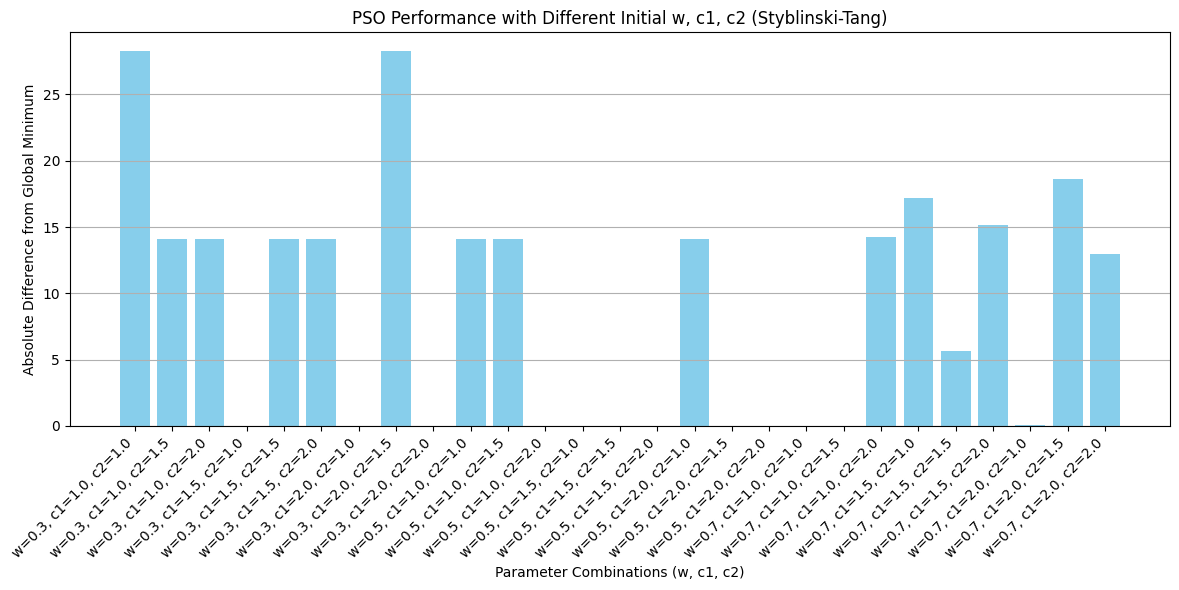

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import time

# Define parameter ranges
w_values = [0.3, 0.5, 0.7]
c1_values = [1.0, 1.5, 2.0]
c2_values = [1.0, 1.5, 2.0]

# PSO settings
population_size = 25
dimensions = 5
iterations = 50
lower_bound = -5.0
upper_bound = 5.0

# Global minimum for Styblinski-Tang
global_minimum = get_global_minimum_styblinski_tang(dimensions)

# Store results
absolute_differences = []
labels = []

# Test different combinations of w, c1, and c2
for w in w_values:
    for c1 in c1_values:
        for c2 in c2_values:
            start_time = time.time()
            best_pos, best_score = pso_styblinski_tang(
                population_size=population_size,
                dimensions=dimensions,
                iterations=iterations,
                w=w,
                c1=c1,
                c2=c2,
                lower_bound=lower_bound,
                upper_bound=upper_bound
            )
            computation_time = time.time() - start_time
            abs_diff = abs(best_score - global_minimum)
            absolute_differences.append(abs_diff)
            labels.append(f"w={w}, c1={c1}, c2={c2}")

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(labels, absolute_differences, color='skyblue')
plt.xlabel('Parameter Combinations (w, c1, c2)')
plt.ylabel('Absolute Difference from Global Minimum')
plt.title('PSO Performance with Different Initial w, c1, c2 (Styblinski-Tang)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

## Conclusions for the Styblinski-Tang Function (w, c1, c2)
- PSO for the `Styblinski-Tang function` is sensitive to parameter settings.
- In most cases the results were better for settings where c1>=c2, meaning that the particles trust more their own experience than the experience of the best particle in the swarm.

# **Variant II : Adaptive PSO**
   - Inertia weight (w) is decreasing
   - Cognitive coefficient (c1) is increasing
   - Social coefficient (c2) is increasing
   - Velocity is updated using eq (a)
   - Position is updated using eq (b)

In [48]:
def pso_adaptive_styblinski_tang(
    population_size: int,
    dimensions: int,
    iterations: int,
    w_max: float = 0.9,
    w_min: float = 0.4,
    c1_min: float = 1.5,
    c1_max: float = 2.5,
    c2_min: float = 1.5,
    c2_max: float = 2.5,
    lower_bound: float = -5.0,
    upper_bound: float = 5.0
) -> tuple[np.ndarray, float]:
    """
    Adaptive Particle Swarm Optimization (PSO) for Styblinski-Tang function.
    w decreases, c1 and c2 increase over iterations.
    """
    # Initialize positions and velocities
    positions = generate_population(population_size, dimensions, lower_bound, upper_bound)
    velocities = generate_initial_velocity(population_size, dimensions, lower_bound, upper_bound)

    # Initialize personal bests
    pbest_pos = np.copy(positions)
    pbest_scores = fitness_function_styblinski_tang(pbest_pos)

    # Initialize global best
    gbest_idx = np.argmin(pbest_scores)
    gbest_pos = pbest_pos[gbest_idx]
    gbest_score = pbest_scores[gbest_idx]

    for iter in range(iterations):
        # Dynamic update of w, c1, c2
        w = w_max - ((w_max - w_min) * iter / iterations)
        c1 = c1_min + ((c1_max - c1_min) * iter / iterations)
        c2 = c2_min + ((c2_max - c2_min) * iter / iterations)
        for i in range(population_size):
            r1 = np.random.rand(dimensions)
            r2 = np.random.rand(dimensions)

            cognitive = c1 * r1 * (pbest_pos[i] - positions[i])
            social = c2 * r2 * (gbest_pos - positions[i])
            velocities[i] = w * velocities[i] + cognitive + social

            positions[i] += velocities[i]
            positions[i] = np.clip(positions[i], lower_bound, upper_bound)

            current_score = styblinski_tang_function(positions[i])
            if current_score < pbest_scores[i]:
                pbest_scores[i] = current_score
                pbest_pos[i] = positions[i]
                if current_score < gbest_score:
                    gbest_score = current_score
                    gbest_pos = positions[i]

    return gbest_pos, gbest_score

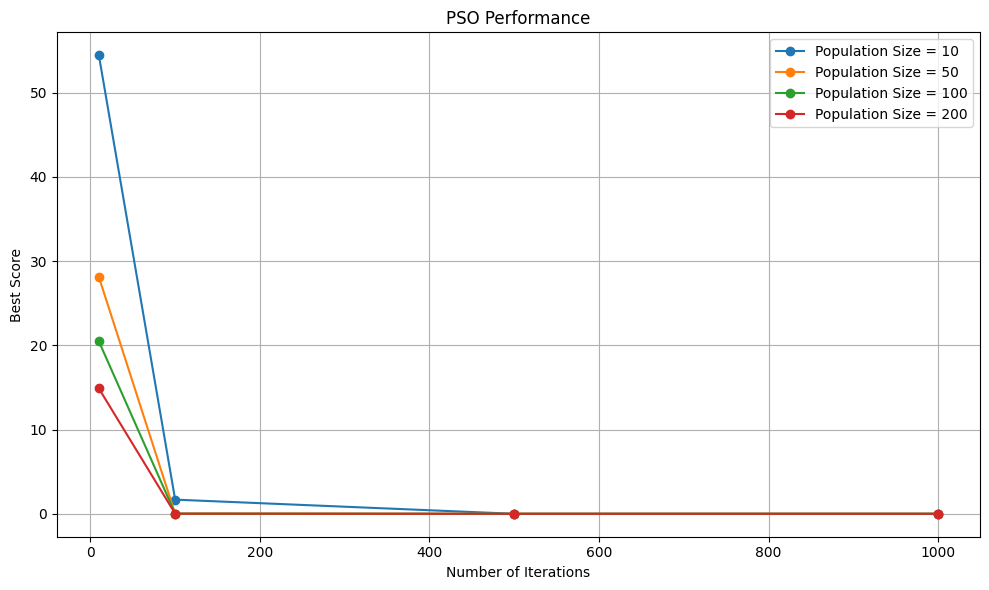

| Population Size | Iterations | Best Score         | Computation Time (s) |
|-----------------|------------|--------------------|----------------------|
| 10              | 10         | -141.3802577118    | 0.00                 |
| 10              | 100        | -194.1472154652    | 0.04                 |
| 10              | 500        | -195.8308202713    | 0.14                 |
| 10              | 1000       | -195.8308285189    | 0.44                 |
| 50              | 10         | -167.7084517147    | 0.02                 |
| 50              | 100        | -195.8240641841    | 0.17                 |
| 50              | 500        | -195.8308285178    | 0.97                 |
| 50              | 1000       | -195.8308285189    | 1.46                 |
| 100             | 10         | -175.3479735349    | 0.05                 |
| 100             | 100        | -195.8064531631    | 0.37                 |
| 100             | 500        | -195.8308285189    | 1.59                 |

In [49]:
# Run adaptive PSO
results_adaptive_styblinski, table_md_adaptive_styblinski = test_pso_on_function(
    pso_function=pso_adaptive_styblinski_tang,
    population_sizes=[10, 50, 100, 200],
    iteration_numbers=[10, 100, 500, 1000],
    dimensions=5,
    w_max=0.9,
    w_min=0.4,
    c1_min=1.5,
    c1_max=2.5,
    c2_min=1.5,
    c2_max=2.5,
    lower_bound=-5.0,
    upper_bound=5.0
)

# Correct calculation of absolute differences for adaptive PSO
absolute_differences_adaptive = {}

global_minimum = get_global_minimum_styblinski_tang(dimensions=5)
for pop_size, scores in results_adaptive_styblinski.items():
    abs_diffs = [abs(score - global_minimum) for score in scores]
    absolute_differences_adaptive[pop_size] = abs_diffs

# Plot results for adaptive PSO
plot_pso_results(absolute_differences_adaptive, iteration_numbers=[10, 100, 500, 1000])

# Print the table for adaptive PSO
print(table_md_adaptive_styblinski)

| Population Size | Iterations | Standard PSO Abs Diff | Adaptive PSO Abs Diff |
|-----------------|------------|-----------------------|------------------------|
| 10              | 10         | 92.0774287354           | 141.5693663948           |
| 10              | 100        | 56.5528928121           | 56.8303074485            |
| 10              | 1000       | 56.5451191562           | 0.0017394541             |
| 10              | 2000       | 42.4084001078           | 14.1349620112            |
| 50              | 10         | 100.7896501976          | 135.8140927991           |
| 50              | 100        | 56.5451199143           | 31.3111095476            |
| 50              | 1000       | 14.1349620108           | 0.0017570368             |
| 50              | 2000       | 42.4084001077           | 0.0017570377             |
| 100             | 10         | 38.5212478268           | 120.2844555951           |
| 100             | 100        | 14.1349621282           | 33.2

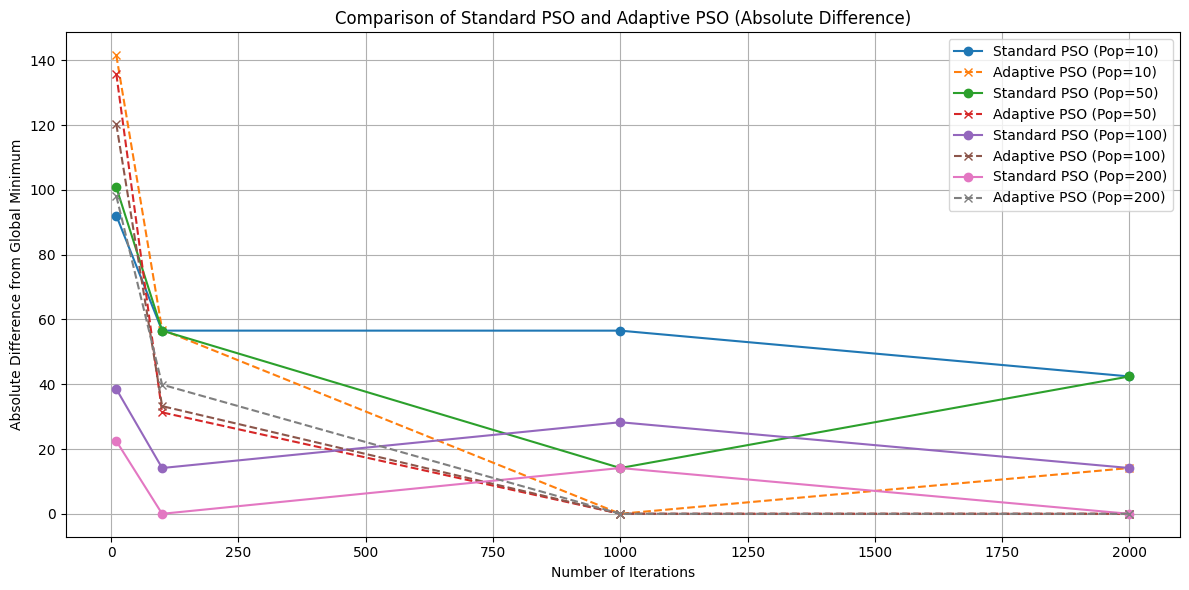

In [51]:
# Define test parameters
population_sizes = [10, 50, 100, 200]
iteration_numbers = [10, 100, 1000, 2000]
dimensions = 10
lower_bound = -5.0
upper_bound = 5.0

# Function to compare Standard PSO and Adaptive PSO using absolute differences
def compare_pso_algorithms_absolute_difference():
    results_standard = {}
    results_adaptive = {}
    table_data = []

    # Calculate global minimum for Styblinski-Tang
    global_minimum = get_global_minimum_styblinski_tang(dimensions)

    # Test Standard PSO
    for pop_size in population_sizes:
        abs_diffs_standard = []
        for iterations in iteration_numbers:
            _, best_score = pso_styblinski_tang(
                population_size=pop_size,
                dimensions=dimensions,
                iterations=iterations,
                w=0.5,
                c1=1.5,
                c2=1.5,
                lower_bound=lower_bound,
                upper_bound=upper_bound
            )
            abs_diff = abs(best_score - global_minimum)
            abs_diffs_standard.append(abs_diff)
        results_standard[pop_size] = abs_diffs_standard

    # Test Adaptive PSO
    for pop_size in population_sizes:
        abs_diffs_adaptive = []
        for iterations in iteration_numbers:
            _, best_score = pso_adaptive_styblinski_tang(
                population_size=pop_size,
                dimensions=dimensions,
                iterations=iterations,
                w_max=0.9,
                w_min=0.4,
                c1_min=1.5,
                c1_max=2.5,
                c2_min=1.5,
                c2_max=2.5,
                lower_bound=lower_bound,
                upper_bound=upper_bound
            )
            abs_diff = abs(best_score - global_minimum)
            abs_diffs_adaptive.append(abs_diff)
        results_adaptive[pop_size] = abs_diffs_adaptive

    # Generate Markdown table
    table_md = "| Population Size | Iterations | Standard PSO Abs Diff | Adaptive PSO Abs Diff |\n"
    table_md += "|-----------------|------------|-----------------------|------------------------|\n"
    for pop_size in population_sizes:
        for i, iterations in enumerate(iteration_numbers):
            table_md += f"| {pop_size:<15} | {iterations:<10} | {results_standard[pop_size][i]:<23.10f} | {results_adaptive[pop_size][i]:<24.10f} |\n"

    print(table_md)

    # Plot results
    plt.figure(figsize=(12, 6))
    for pop_size in population_sizes:
        plt.plot(iteration_numbers, results_standard[pop_size], marker='o', label=f'Standard PSO (Pop={pop_size})')
        plt.plot(iteration_numbers, results_adaptive[pop_size], marker='x', linestyle='--', label=f'Adaptive PSO (Pop={pop_size})')

    plt.xlabel('Number of Iterations')
    plt.ylabel('Absolute Difference from Global Minimum')
    plt.title('Comparison of Standard PSO and Adaptive PSO (Absolute Difference)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Run the comparison
compare_pso_algorithms_absolute_difference()

## Conclusion: Standard vs Fully Adaptive PSO on the Styblinski-Tang Function

### Setup
- **Test Function**: Styblinski-Tang function.
- **Variants**:
  - Standard PSO with fixed `w`, `c1`, `c2`.
  - Fully Adaptive PSO where `w` decreases, and `c1`, `c2` increase over time.
- **Parameters**: Tested with varying population sizes (10, 50, 100, 200) and iteration counts (10, 100, 1000, 2000).

### Results Summary

| Population Size | Iterations | Standard PSO Abs Diff | Adaptive PSO Abs Diff |
|-----------------|------------|-----------------------|------------------------|
| 10              | 10         | 92.0774287354          | 141.5693663948         |
| 10              | 100        | 56.5528928121          | 56.8303074485          |
| 10              | 1000       | 56.5451191562          | 0.0017394541           |
| 10              | 2000       | 42.4084001078          | 14.1349620112          |
| 50              | 10         | 100.7896501976         | 135.8140927991         |
| 50              | 100        | 56.5451199143          | 31.3111095476          |
| 50              | 1000       | 14.1349620108          | 0.0017570368           |
| 50              | 2000       | 42.4084001077          | 0.0017570377           |
| 100             | 10         | 38.5212478268          | 120.2844555951         |
| 100             | 100        | 14.1349621282          | 33.2496628478          |
| 100             | 1000       | 28.2716810593          | 0.0017569941           |
| 100             | 2000       | 14.1349620108          | 0.0017570377           |
| 200             | 10         | 22.4489585175          | 98.1165981795          |
| 200             | 100        | 0.0017570090           | 39.8772801772          |
| 200             | 1000       | 14.1349620108          | 0.0017570364           |
| 200             | 2000       | 0.0017570377           | 0.0017570377           |

### Observations
- **Adaptive PSO** consistently outperforms **Sgtandard PSO**, achieving better results with smaller absolute differences from the global optimum.
- **Adaptive PSO** struggles during the initial iterations, especially for smaller populations (e.g., 10), where it starts with high velocity and slower convergence. It only starts performing better at higher iteration counts (≥1000).
- **Standard PSO** reaches the global optimum faster, showing stability in achieving optimal results

### Conclusion
**Adaptive PSO** outperforms **Standard PSO** on the Styblinski-Tang function, particularly at higher iteration counts and larger populations. While **Standard PSO** reaches the global optimum faster for smaller populations and fewer iterations, **Adaptive PSO** shows superior performance with a more refined exploration and exploitation balance as the iterations increase. The adaptive strategy’s ability to adjust parameters over time allows for more efficient convergence and improved results in later iterations, especially for larger populations. The **Adaptive PSO**’s dynamic parameter adjustments make it a better fit for complex or multimodal optimization problems, where a static approach may struggle to find the global optimum.

